# 线性回归模型的应用

## 生成一个用于回归分析的有1个特征的数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 导入回归数据生成器
from sklearn.datasets import make_regression
# 导入线性回归模型
from sklearn.linear_model import LinearRegression
# 导入均方误差评估模块
from sklearn.metrics import mean_squared_error
# 生成用于回归分析的数据集
X,y = make_regression(n_samples=50,n_features=1,n_informative=1,random_state=3,noise=50)

## 使用线性回归模型对数据进行拟合

In [2]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

## 画出线性回归模型图形

Text(0.5, 1.0, 'Linear Regression')

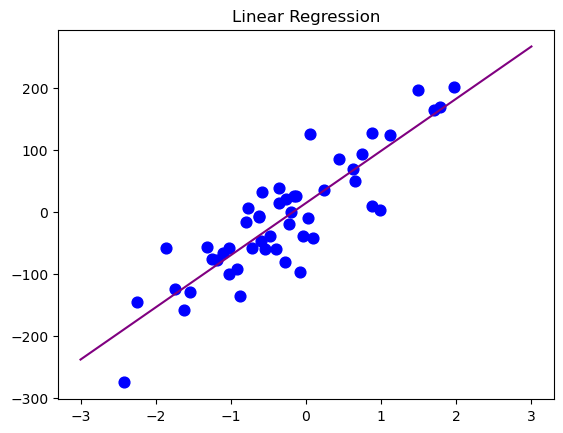

In [3]:
# z是我们生成的等差数列，用来画出线性模型的图形
z = np.linspace(-3,3,100).reshape(-1,1)
plt.scatter(X,y,c='b',s=60)
plt.plot(z,lr.predict(z),c='purple')
plt.title("Linear Regression")

## 输出线性回归模型的系数、截距和方程

In [4]:
print("代码运行结果:\n")
print("================================")
print("直线的斜率为：",lr.coef_[0])
print("直线的截距为：",lr.intercept_)
print(f"直线的方程为：y={lr.coef_[0]}x+{lr.intercept_}")
print("================================")

代码运行结果:

直线的斜率为： 84.1608716490267
直线的截距为： 14.475840238473038
直线的方程为：y=84.1608716490267x+14.475840238473038


## 生成用于回归分析的有2个特征的数据集

In [5]:
from sklearn.model_selection import train_test_split
# 生成用于回归分析的有2个特征的数据集
X,y = make_regression(n_samples=100,n_features=2,n_informative=2,random_state=38)

## 使用线性回归对数据进行拟合，并输出线性回归模型的系数、截距

In [6]:
# 拆分数据
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)
# 训练数据
lr2 = LinearRegression().fit(X_train,y_train)
# 预测数据
y_predict = lr2.predict(X_test)

In [7]:
print("代码运行结果:\n")
print("================================")
print("lr2的斜率为：",lr2.coef_[:])
print("lr2的截距为：",lr2.intercept_)
print(f"lr2的方程为：y={lr2.coef_[0]}x1+{lr2.coef_[1]}x2+{lr2.intercept_}")
print("================================")

代码运行结果:

lr2的斜率为： [70.38592453  7.43213621]
lr2的截距为： -1.0658141036401503e-14
lr2的方程为：y=70.3859245284068x1+7.432136214775875x2+-1.0658141036401503e-14


## 线性回归模型的性能评估

In [8]:
# 均方误差评估
mse = mean_squared_error(y_test,y_predict)
print("================================")
print("均方误差为：",mse)
print("================================")

均方误差为： 5.336192971027169e-28


# 波士顿房价预测

## 数据集探索

In [9]:
# from sklearn.datasets import load_boston
# `load_boston` has been removed from scikit-learn since version 1.2.
# https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

data.shape

(506, 13)

In [10]:
target.shape

(506,)

## 用线性回归模型拟合数据并进行预测

In [11]:
from sklearn.model_selection import train_test_split
# 拆分数据
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=36)
# 训练数据
lr_boston = LinearRegression().fit(X_train,y_train)
# 预测数据
y_predict = lr_boston.predict(X_test)

## 对模型进行评估

In [12]:
# 导入均方误差评估模块
from sklearn.metrics import mean_squared_error
# 均方误差评估
mse = mean_squared_error(y_test,y_predict)
print("线性回归模型的均方误差为：\n",mse)

线性回归模型的均方误差为：
 24.004430052241904


## 输出线性回归模型的系数和偏置

In [13]:
print("代码运行结果:\n")
print("================================")
print("lr_boston的斜率为：",lr_boston.coef_[:])
print("lr_boston的截距为：",lr_boston.intercept_)
print("================================")

代码运行结果:

lr_boston的斜率为： [-9.97859985e-02  4.36000046e-02  3.83811635e-02  3.45187835e+00
 -1.64404146e+01  3.96312862e+00 -7.41840830e-03 -1.50795571e+00
  2.60346433e-01 -1.07545027e-02 -9.71955449e-01  1.17777648e-02
 -5.40689068e-01]
lr_boston的截距为： 34.676258283188105


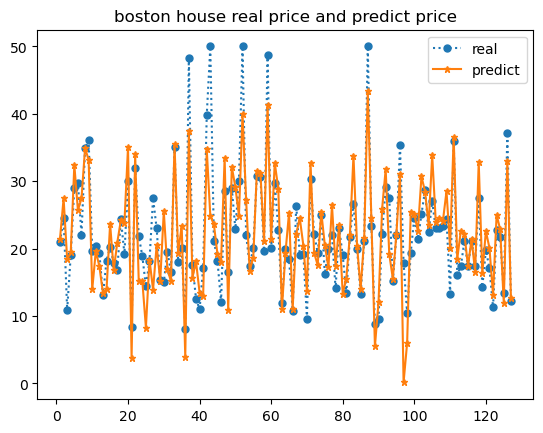

In [14]:
## 绘制波士顿真是放假与预测房价走势图
plt.figure()
x = np.arange(1, y_predict.shape[0] + 1)
# 真实值走势
plt.plot(x, y_test,marker="o",linestyle=":",markersize=5)
plt.plot(x,y_predict,marker="*",markersize=5)
plt.legend(['real',"predict"])
plt.title("boston house real price and predict price")
plt.show()

# 岭回归模型的应用（boston房价）

In [15]:
# 导入岭回归模型
from sklearn.linear_model import Ridge
# 使用岭回归模型对数据进行拟合
ridge = Ridge(alpha=1.0)
# 训练数据
ridge.fit(X_train,y_train)
y_predict = ridge.predict(X_test)
print("")
print("================================")
print("ridge的斜率为：",ridge.coef_[:])
print("ridge的截距为：",ridge.intercept_)
print("================================")


ridge的斜率为： [-0.0953679   0.04589527  0.01069857  3.07060892 -8.77412032  3.98898723
 -0.01323409 -1.39995633  0.24580113 -0.0116064  -0.88526616  0.01204574
 -0.5596903 ]
ridge的截距为： 29.558076258955236


# 套索回归模型的应用（boston房价）

In [16]:
# 导入套索回归模型
from sklearn.linear_model import Lasso
# 使用套索回归模型对数据进行拟合
lasso = Lasso(alpha=1.0)
# 训练数据
lasso.fit(X_train,y_train)
y_predict = lasso.predict(X_test)
print("")
print("================================")
print("lasso的斜率为：",lasso.coef_[:])
print("lasso的截距为：",lasso.intercept_)
print("================================")


lasso的斜率为： [-0.05667701  0.04951008  0.          0.         -0.          0.90690771
  0.015408   -0.78938302  0.20376589 -0.01209622 -0.75278709  0.00998691
 -0.80797632]
lasso的截距为： 41.95188297539425


# 糖尿病患者病情预测

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# 导入均方误差评估模块
from sklearn.metrics import mean_squared_error
# 导入数据集
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [18]:
diabetes['data'].shape

(442, 10)

In [19]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1